PROJETO CALL CENTER (Relatório de Vendas)
___________________________________________________________

ETL
-------------------------------------------------

In [3]:
#Importamos o pandas e os plotly's graph e express
#------------------------------------------------------------------------------------
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px 

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
# Alteração da coluna 'Mês'. Onde há texto, substituímmos pelo número que representa aquele mês
#------------------------------------------------------------------------------------
df.loc[df['Mês'] == 'Jan', 'Mês'] = 1
df.loc[df['Mês'] == 'Fev', 'Mês'] = 2
df.loc[df['Mês'] == 'Mar', 'Mês'] = 3
df.loc[df['Mês'] == 'Abr', 'Mês'] = 4
df.loc[df['Mês'] == 'Mai', 'Mês'] = 5
df.loc[df['Mês'] == 'Jun', 'Mês'] = 6
df.loc[df['Mês'] == 'Jul', 'Mês'] = 7
df.loc[df['Mês'] == 'Ago', 'Mês'] = 8
df.loc[df['Mês'] == 'Set', 'Mês'] = 9
df.loc[df['Mês'] == 'Out', 'Mês'] = 10
df.loc[df['Mês'] == 'Nov', 'Mês'] = 11
df.loc[df['Mês'] == 'Dez', 'Mês'] = 12

In [6]:
#Alteração de variáveis
#------------------------------------------------------------------------------------
df['Chamadas Realizadas'] = df['Chamadas Realizadas'].astype(int)
df['Dia'] = df['Dia'].astype(int)
df['Mês'] = df['Mês'].astype(int)


#Aqui vamos retirar o padrão 'R$ ' que há na coluna 'Valor pago'
#------------------------------------------------------------------------------------
df['Valor Pago'] = df['Valor Pago'].str.lstrip('R$ ')
df['Valor Pago'] = df['Valor Pago'].astype(int)

In [7]:
df.loc[df['Status de Pagamento'] == 'Pago', 'Status de Pagamento'] = 1
df.loc[df['Status de Pagamento'] == 'Não pago', 'Status de Pagamento'] = 0

In [8]:
df['Status de Pagamento'] = df['Status de Pagamento'].astype(int)

Gráficos
------------------------------------------------------

Comentando as variáveis criadas
____________________________________

In [27]:
#------------------------------------------------------------------------------------
#gpVendas equivale ao agrupamento de vendas total por equipe
#grafVendasE é o nosso gráfico de vendas total por equipe
#------------------------------------------------------------------------------------
#gpChamadasD equivale ao agrupamento do total de chamado  por dia do mês
#grafChamadasD é o nosso gráfico total de chamados por dia do mês
#------------------------------------------------------------------------------------
#gpChamadasM equivale ao agrupamento do total de chamado por mês
#grafChamadasM é o nosso gráfico total de chamados por mês
#------------------------------------------------------------------------------------
#gpPagamentosP equivale ao agrupamento do total de pagamentos por propaganda
#grafPagamentosP é o nosso gráfico de total de pagamentos por mês nos meios de propagandas
#------------------------------------------------------------------------------------
#gpPagMeioProp é o agrupamento do valor total pago por meio de propaganda.
#grafPagMeioProp é o nosso gráfico de valor total pago por meio de propaganda.
#------------------------------------------------------------------------------------
#gpValorPgE é o agrupamento do valor pago por equipe
#gpValorPgM é o agrupamento do valor pago por mês
#grafValorPgM é o gráfico de linha em que representamos os dois agrupamentos acima.

Gráfico: Total de Vendas x Equipe
_______________________________________

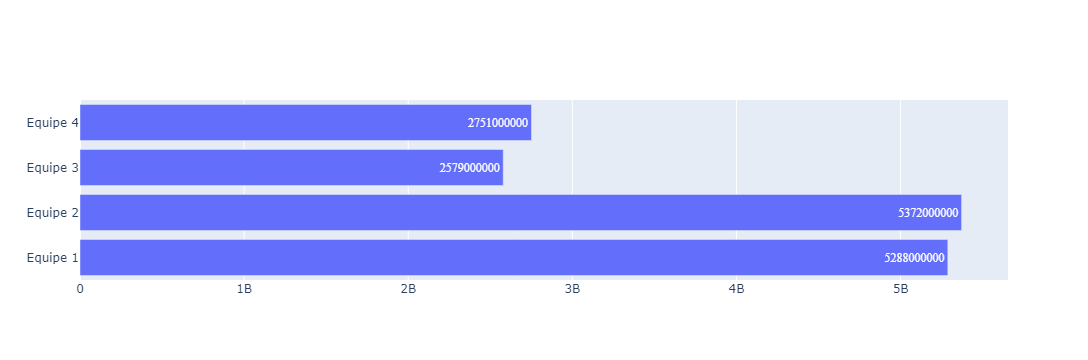

In [81]:
#Agrupamos a soma de vendas, representado pela coluna 'Valor Pago', por 'Equipe', aplicando o seu index padrão com o 'reset.index()'
gpVendas = df.groupby('Equipe')['Valor Pago'].sum().reset_index()

#Construímos um gráfico de barras na horizontal, aplicando ao eixo x a soma dos valores e o eixo y as equipes.
grafVendasE = go.Figure(go.Bar(
    #eixo x recebendo os valores
    x = gpVendas['Valor Pago'],
    
    #eixo y recebendo o nome das equipes
    y = gpVendas['Equipe'],
    
    #orientação do tipo barras em horizontal
    orientation = 'h',
    
    #posição do texto foi automática
    textposition = 'auto',
    
    #Este é o rótulo de dados
    text = gpVendas['Valor Pago'],
    insidetextfont = dict (family = 'Time', size = 12)
)
)
grafVendasE.show()

Gráfico: Média de Chamadas x Dia do Mês
_______________________________________

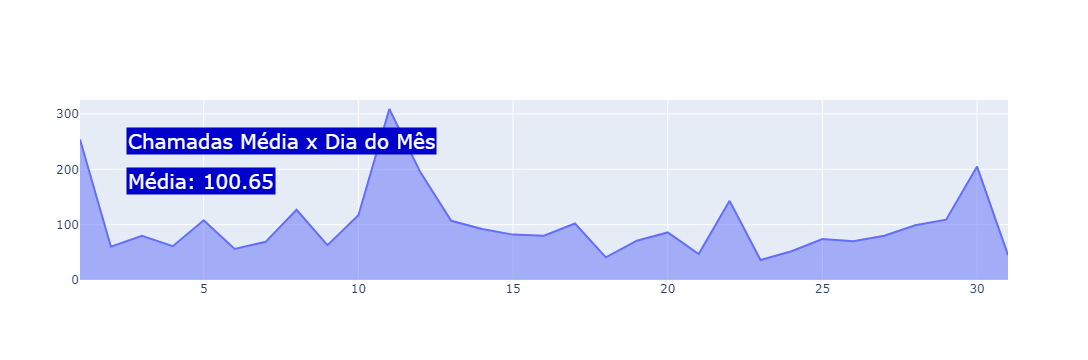

In [79]:
#Agrupamos a quantidade de chamados por dia, representado pela coluna 'Chamadas Realizadas', por 'Dia', aplicando o seu index padrão com o 'reset.index()'
gpChamadasD = df.groupby('Dia')['Chamadas Realizadas'].sum().reset_index()

#Construímos um gráfico de linhas onde no eixo x temos o dia , representado pela coluna 'Dias, e, no eixo y temos a quantidade de chamadas realizadas, representadas pela colunas 'Chamadas Realizadas'.
grafChamadasD = go.Figure(
    go.Scatter(
        x = gpChamados['Dia'],
        y = gpChamados['Chamadas Realizadas'],
        mode = 'lines',
        fill = 'tonexty'
    )
)

#Adicionamos uma anotação, apenas para dar um título ao gráfico.
grafChamadasD.add_annotation(
    text = 'Chamadas Média x Dia do Mês',
    xref = "paper",
    yref = "paper",
    
    #Temos abaixo algumas configurações como de tamanho, cor da letra, alinhamento e o background da anotação
    font = dict (
        size = 20,
        color = 'white',
    ),
    align = "center",
    bgcolor = "rgba(0,0,0.8)",
    
    #Aqui é a posição da notação/título do gráfico.
    x = 0.05,
    y = 0.85,
    showarrow = False
)

#Adicionamos uma anotação com cálculo de média, para facilitar a visualização da informação, deixando esta média com duas casas decimais.
grafChamadasD.add_annotation(
    text =f"Média: {round(gpChamadasD['Chamadas Realizadas'].mean(), 2)}",
    xref = "paper",
    yref = "paper",
    font = dict(
                size = 20,
                color = 'white'
    ),
    align = "center",
    bgcolor = "rgba(0,0,0.8)",
    x = 0.05,
    y = 0.55,
    showarrow = False        
)

Gráfico: Média de Chamadas x Mês
_______________________________________

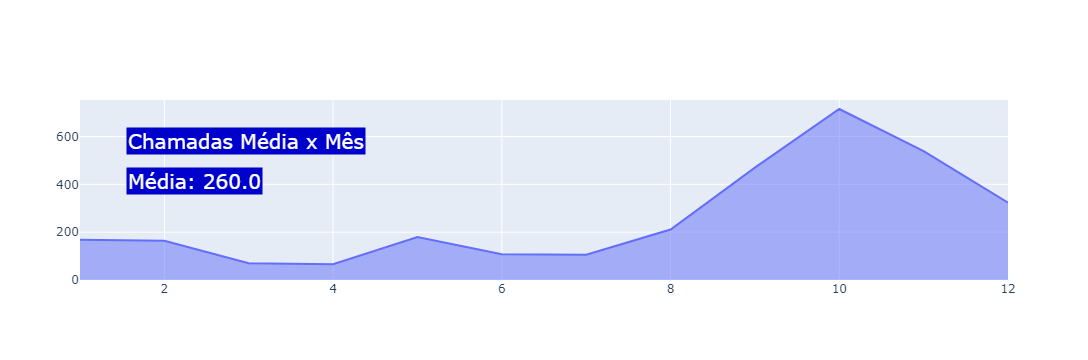

In [78]:
#Agrupamos a quantidade de chamados por mês, representado pela coluna 'Chamadas Realizadas', por 'Mês', aplicando o seu index padrão com o 'reset.index()'
gpChamadasM = df.groupby('Mês')['Chamadas Realizadas'].sum().reset_index()

#Criamos um gráfico de linha, representando no eixo x o mês e no eixo y a soma das chamadas realizadas.
grafChamadasM = go.Figure(
    go.Scatter(
        x = gpChamadasM['Mês'],
        y = gpChamadasM['Chamadas Realizadas'],
        mode = 'lines',
        fill = 'tonexty' 
    )
)

#Adicionamos uma anotação, apenas para dar um título ao gráfico.
grafChamadasM.add_annotation(
    text = 'Chamadas Média x Mês',
    xref = "paper",
    yref = "paper",
    
    #Temos abaixo algumas configurações como de tamanho, cor da letra, alinhamento e o background da anotação
    font = dict (
        size = 20,
        color = 'white',
    ),
    align = "center",
    bgcolor = "rgba(0,0,0.8)",
    
    #Aqui é a posição da notação/título do gráfico.
    x = 0.05,
    y = 0.85,
    showarrow = False
)

#Adicionamos uma anotação com cálculo de média, para facilitar a visualização da informação, deixando esta média com duas casas decimais.
grafChamadasM.add_annotation(
    text =f"Média: {round(gpChamadasM['Chamadas Realizadas'].mean(), 2)}",
    xref = "paper",
    yref = "paper",
    font = dict(
                size = 20,
                color = 'white'
    ),
    align = "center",
    bgcolor = "rgba(0,0,0.8)",
    x = 0.05,
    y = 0.55,
    showarrow = False        
)

Gráfico: Qtd Pagamentos x Meio de Propaganda
_______________________________________

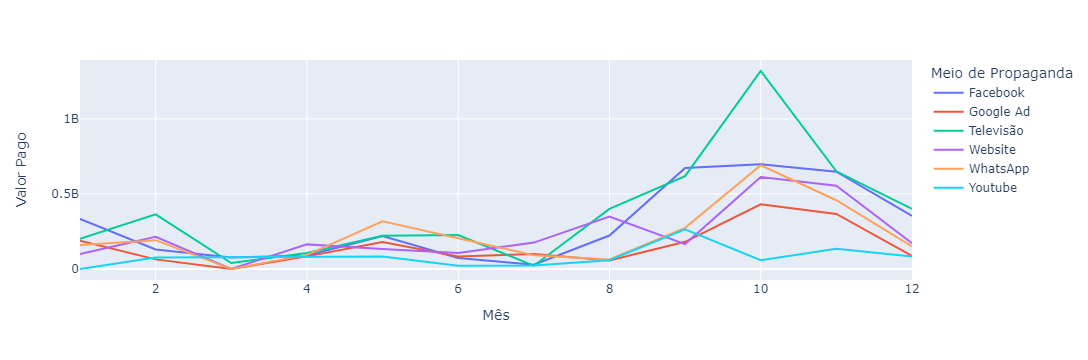

In [77]:
#Agrupamos o total de pagamentos realizados através do meio de propaganda
gpPagamentosP = df.groupby(['Meio de Propaganda', 'Mês'])['Valor Pago'].sum().reset_index()

#Aplicamos um gráfico de linhas tendo no eixo x o valor pago e no eixo y o mês. A legenda será o meio de propaganda.
grafPagamentosP = px.line(
    gpPagamentosP,
    y = "Valor Pago",
    x = "Mês",
    color = "Meio de Propaganda"
)
grafPagamentosP.show()

Gráfico: Total Pago x Meio de Propaganda
_______________________________________

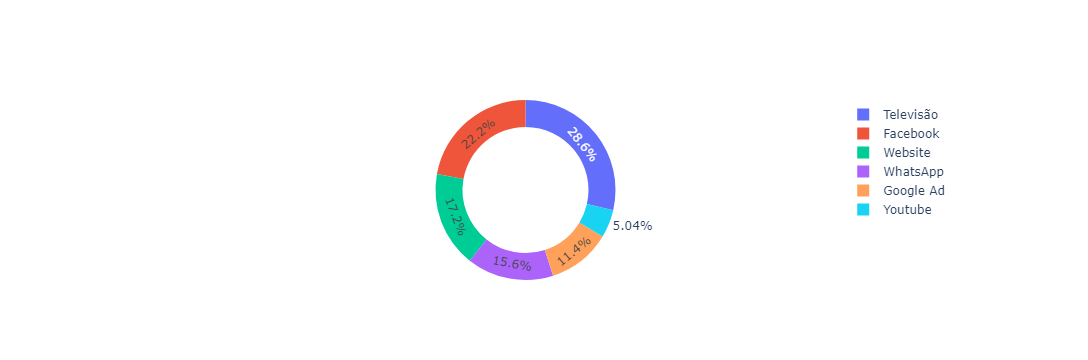

In [74]:
#Agrupamos o total de pagamentos realizados através do meio de propaganda
gpPagMeioProp = df.groupby('Meio de Propaganda')['Valor Pago'].sum().reset_index()

#Aqui construímos um gráfico de pizza simples, segregando por meio de propaganda.
grafPagMeioProp = go.Figure()
grafPagMeioProp.add_trace(
    go.Pie(
        labels = gpPagMeioProp['Meio de Propaganda'],
        values = gpPagMeioProp['Valor Pago'],
        hole = .7
    )
)

Gráfico: Total Pago x Equipe (Seg. por Mês)
_______________________________________

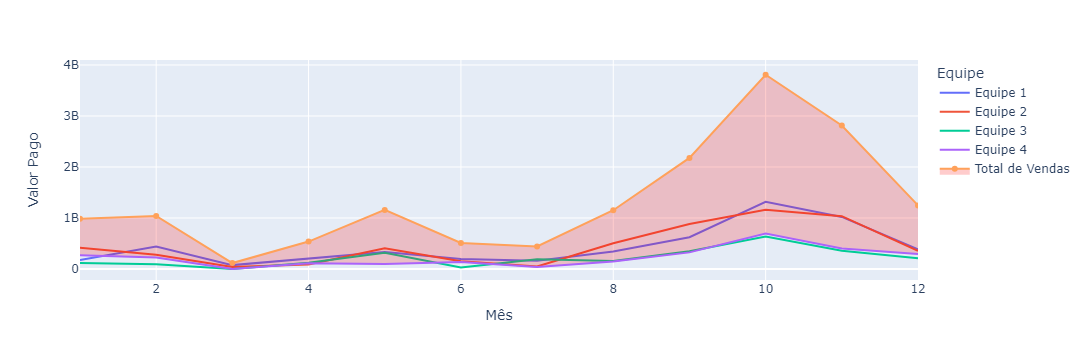

In [73]:
gpValorPgE = df.groupby(['Mês', 'Equipe'])['Valor Pago'].sum().reset_index()
gpValorPgM = df.groupby('Mês')['Valor Pago'].sum().reset_index()

#Gráfico de linhas, tendo no eixo x o valor pago e, no eixo y, o mês, segregado por legendas, indexada pela coluna 'Equipe'
grafValorPgM = px.line(
    gpValorPgE,
    y = "Valor Pago",
    x = "Mês",
    color = "Equipe"
)

#Ainda no mesmo gráfico iremos adicionar a linha de total de vendas por mês
grafValorPgM.add_trace(
    go.Scatter(
        y = gpValorPgM["Valor Pago"],
        x = gpValorPgM["Mês"],
        mode = 'lines+markers',
        fill = 'tonexty',
        fillcolor = 'rgba (255,0,0,0.2)',
        name = 'Total de Vendas'
    )
)

Indicadores
------------------------------------------------------

Ranking: Melhor Consultor de Vendas
__________________________________________

In [96]:
#Temos aqui o gpRankingM que significa o RANKING DO MELHOR CONSULTOR DE VENDAS, onde ordenaremos sempre pelo que vendeu mais até o que vendeu menos.
gpRankingM = df.groupby(['Consultor','Equipe'])['Valor Pago'].sum()

#Faremos aqui uma reordenação, ou seja, ordenaremos do que vendeu mais para o que vendeu menos.
gpRankingM.sort_values(ascending = False, inplace = True)

#Reordenaremos o index.
gpRankingM.reset_index()



,Consultor,Equipe,Valor Pago
0,Laura,Equipe 2,1727000000
1,Helena,Equipe 2,1626000000
2,Bernardo,Equipe 4,1534000000
3,Lorenzo,Equipe 1,1320000000
4,Heitor,Equipe 2,1276000000
5,Sophia,Equipe 3,1205000000
6,Theo,Equipe 4,1177000000
7,Davi,Equipe 1,1066000000
8,Lucas,Equipe 1,1029000000
9,João,Equipe 3,995000000


In [97]:
#Criando o gráfico
gpRankingM = go.Figure()
gpRankingM.add_trace(
    go.Indicator(
        mode = 'number+delta',
        title = {"text": f"<span style='font-size:150%'> {gpRankingM['Consultor'].iloc[0]} - Top Consultant</span><br><span style='font-size:70%'>Em vendas em relação a média</span><br>"},
        value = gpRankingM['Valor Pago'].iloc[0],
        number = {'prefix': "R$"},
        delta = {'relative': True, 'valueformat': '.1%', 'reference':gpRankingM['Valor Pago'].mean()}
    )
)

KeyError: 'Consultor'